In [13]:
import cv2 as cv

img = cv.imread('../figs/Apples.png' )
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


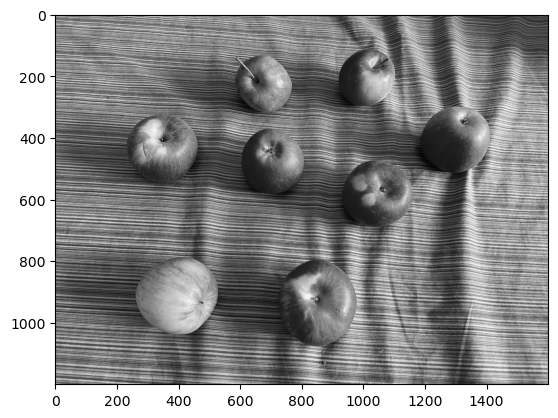

In [14]:
import matplotlib.pyplot as plt

plt.imshow(gray_img, cmap='gray')
plt.show()

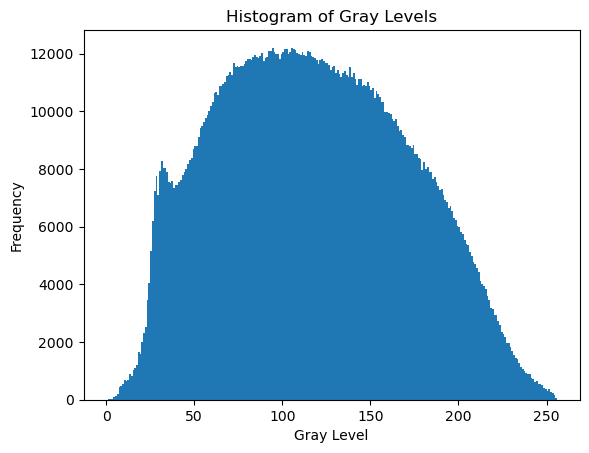

In [18]:
import matplotlib.pyplot as plt

hist, bins, x = plt.hist(gray_img.flatten(), bins=256, range=[0, 256])

plt.title("Histogram of Gray Levels")
plt.xlabel("Gray Level")
plt.ylabel("Frequency")
plt.show()


There is a concerning peak betwen 0 and 50 let try to get that part of the info by threshholding the picture

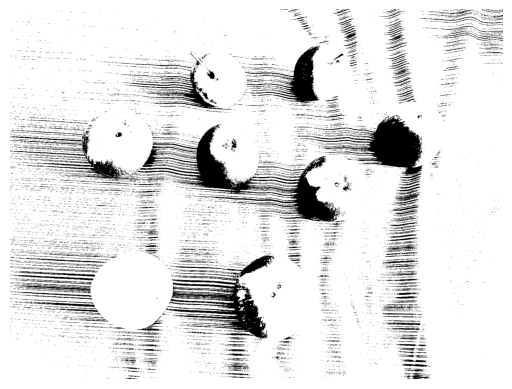

In [68]:
import numpy as np
import matplotlib.pyplot as plt


mask = gray_img > 50

thresholded_image_sup_50 = gray_img.copy()
thresholded_image_sup_50[mask] = 255
thresholded_image_sup_50[ thresholded_image_sup_50!= 255 ] = 0

plt.imshow(thresholded_image_sup_50, cmap='gray')
plt.axis('off')
plt.show()


In [27]:
import numpy as np
from scipy.signal import argrelextrema

# Assuming you have your histogram data stored in the variable 'histogram'
# Convert the histogram to a numpy array
histogram = np.array(hist)

# Find the local maxima in the histogram
local_maxima_indices = argrelextrema(histogram, np.greater)

# Get the values of the local maxima
local_maxima_values = histogram[local_maxima_indices]

# Print the values of the local maxima
for value in local_maxima_indices:
    print(value)


[ 10  13  18  28  31  33  37  50  62  70  72  74  80  84  88  92  94 101
 105 111 114 122 125 129 131 135 138 140 143 146 148 151 153 159 164 167
 171 174 180 182 186 190 195 221 228 244 246 251]


We could the 37 value as a threshold 

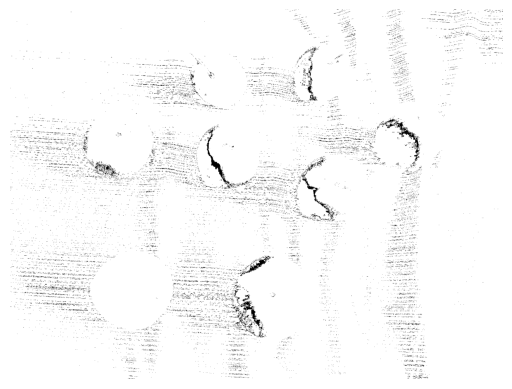

In [61]:
thresholded_image = gray_img.copy()
thresholded_image[np.logical_or(thresholded_image > 40, thresholded_image < 35)] = 255
thresholded_image[ thresholded_image!= 255 ] = 0
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()

In [72]:
_, contours = cv.findContours(thresholded_image_sup_50, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

print("Number of contours found = ", len(contours))

for cont in contours:
    rect = cv.boundingRect(cont)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cont_img = cv.drawContours(img.copy(), [box], 0, (0, 255, 0), 3)

ValueError: not enough values to unpack (expected 3, got 2)

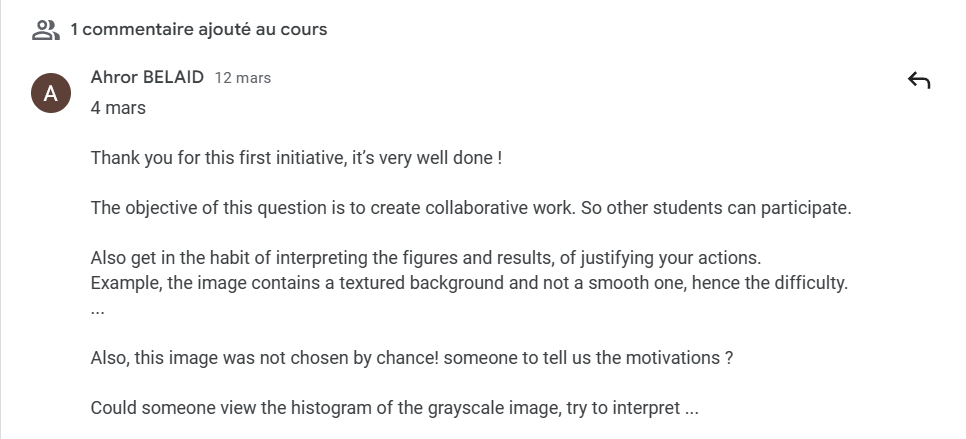